# Behaviour of Linear Model 8A

# Task 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

## 1.1 Creating Datapoints and applying SVM

[LibSVM][LibSVM][LibSVM]

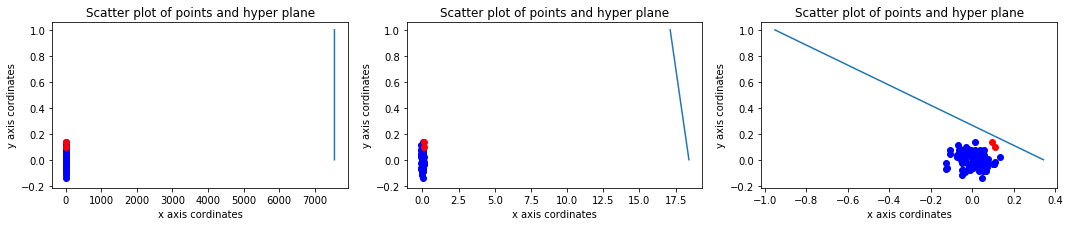

[LibSVM][LibSVM][LibSVM]

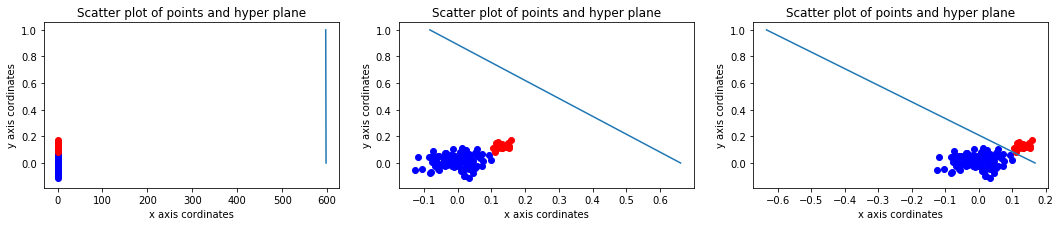

[LibSVM][LibSVM][LibSVM]

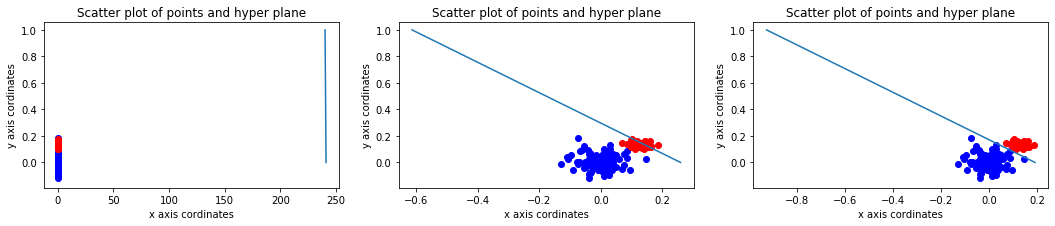

[LibSVM][LibSVM][LibSVM]

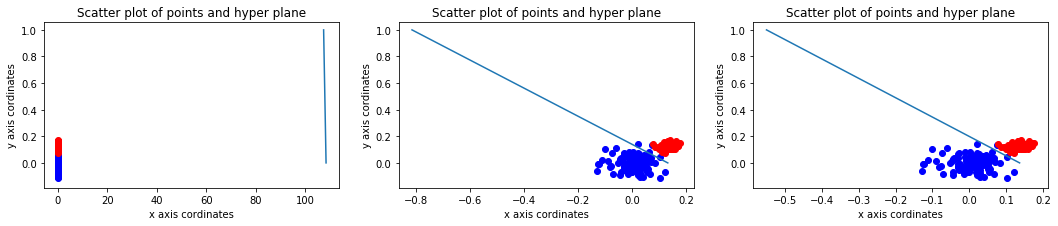

In [4]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
c_list = [0.001, 1, 100] #list of different values regularizier
for j,i in enumerate(ratios): 
    plt.figure(figsize=(18,14))
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for a in range(len(c_list)):
        plt.subplot(4,3,a+1)
        clf = SVC(C=c_list[a],kernel='linear', degree=3,probability=False, tol=0.001, cache_size = 200, class_weight=None, verbose=2, max_iter=1000, decision_function_shape='ovr', random_state=15)
        clf.fit(X=X,y=y)
        coef = clf.coef_
        intercept = clf.intercept_
        y_max = np.amax(y)
        y_min = np.amin(y)
        
        X_pos = np.empty((i[0],2))

        X_neg = np.empty((i[1],2))
        l= 0
        m =0
        for r in range(len(X)):
            if y[r]==1:
                X_pos[l] = X[r]
                l +=1
            else:
                X_neg[m]= X[r]
                m +=1
        
        plt.scatter(X_pos[:, 0], X_pos[:, 1],color = 'blue')
        plt.scatter(X_neg[:, 0], X_neg[:, 1],color = 'red')
        plt.xlabel('x axis cordinates')
        plt.ylabel('y axis cordinates')
        plt.title('Scatter plot of points and hyper plane')
        hyper_plane = draw_hyper_plane(coef,intercept,y_max,y_min)
    plt.show()


In [2]:
def draw_hyper_plane(coef,intercept,y_max,y_min):
            points=np.array([[((-coef[0][1]*y_min - intercept)/coef[0][0]), y_min],[((-coef[0][1]*y_max - intercept)/coef[0][0]), y_max]])
            plt.plot(points[:,0], points[:,1])

Conclusions:
1. Position of hyper plane is greatly affected by class imbalance and regularization parameter C.
2. As we can see from first figure (i.e (1,1)) where regularization parameter(i.e C = 0.001) and class imbalance is maximum( i.e (100,2)) hyperplane is way too far from the right direction. As we know regularization strength is inversely proportional to parameter so more the imbalance and more the strength hyper plane tends to more far away from the right direction.
3. For minimum regularization parameter as classes become more balanced than SVM tries to more hyper plane in rigth direction.
4. When class imbalance is minimum (i.e. (100,80)) and regularization parameter is maximum (i.e 100) SVM is able to correctly identify the position of hyper plane
5. For same data more is the regularization strength more better will be the postion of hyper plane i.e more accurately it can classify two classes.

# Task 2

## 2.1 Creating Data points and Applying Logistic Regession

[LibLinear][LibLinear][LibLinear]

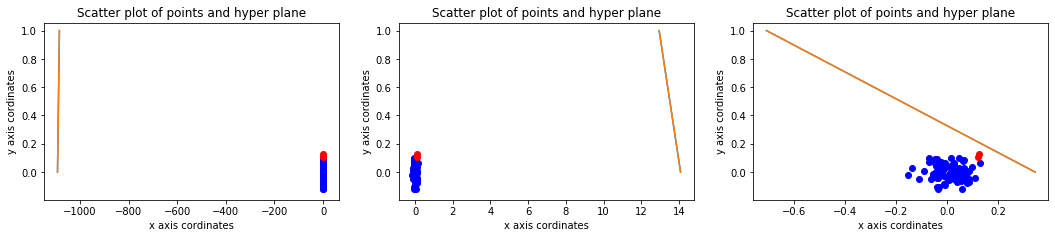

[LibLinear][LibLinear][LibLinear]

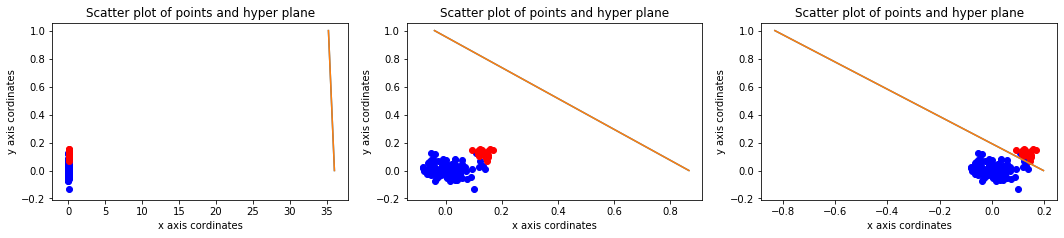

[LibLinear][LibLinear][LibLinear]

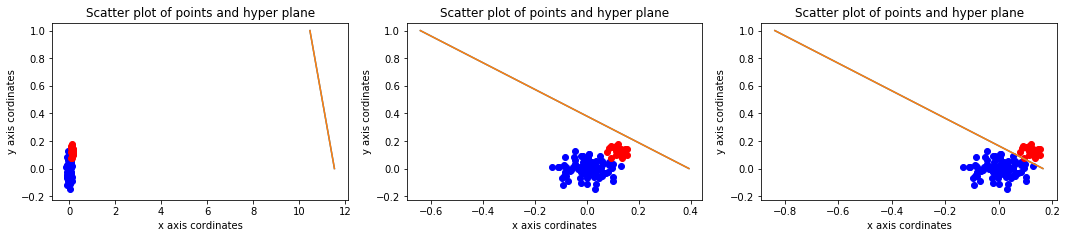

[LibLinear][LibLinear][LibLinear]

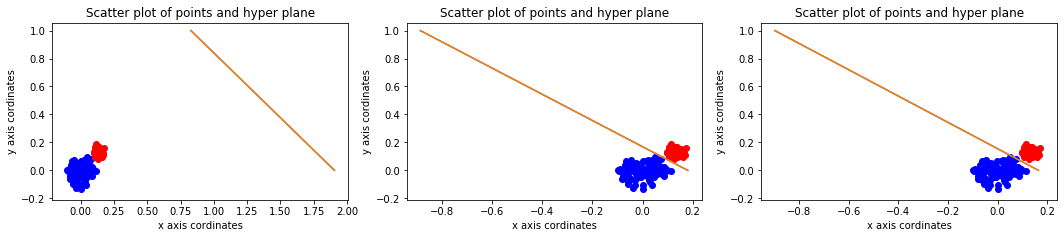

In [5]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
c_list = [0.001, 1, 100]

for j,i in enumerate(ratios): 
    plt.figure(figsize=(18,15))
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for a in range(len(c_list)):
        plt.subplot(4,3,a+1)
        clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=c_list[a], fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=40, solver='warn', max_iter=100, multi_class='warn', verbose=2, warm_start=False, n_jobs=None, l1_ratio=None)
        clf.fit(X=X,y=y)
        coef = clf.coef_
#        print('coef',coef[0][1])
        intercept = clf.intercept_
#        print('intercept',intercept)
        y_max = np.amax(y)
#        print('y_max',y_max )
        y_min = np.amin(y)
        hyper_plane = draw_hyper_plane(coef,intercept,y_max,y_min)
        X_pos = np.empty((i[0],2))
#        print('X_pos',X_pos)
        X_neg = np.empty((i[1],2))
        l =0
        m=0
        for r in range(len(X)):
            if y[r]==1:
                X_pos[l] = X[r]
                l +=1
            else:
                X_neg[m]= X[r]
                m +=1
#        print('X_pos',X_pos)        
        plt.scatter(X_pos[:, 0], X_pos[:, 1],color = 'blue')
        plt.scatter(X_neg[:, 0], X_neg[:, 1],color = 'red')
        plt.xlabel('x axis cordinates')
        plt.ylabel('y axis cordinates')
        plt.title('Scatter plot of points and hyper plane')
        hyper_plane = draw_hyper_plane(coef,intercept,y_max,y_min)
    plt.show()

Conclusions:
1. Position of hyper plane is greatly affected by class imbalance and regularization parameter C.
2. As we can see from first figure (i.e (1,1)) where regularization parameter(i.e C = 0.001) and class imbalance is maximum( i.e (100,2)) hyperplane is way too far from the right direction. As we know regularization strength is inversely proportional to parameter so more the imbalance and more the strength hyper plane tends to more far away from the right direction.
3. For minimum regularization parameter as classes become more balanced than SVM tries to more hyper plane in rigth direction.
4. When class imbalance is minimum (i.e. (100,80)) and regularization parameter is maximum (i.e 100) SVM is able to correctly identify the position of hyper plane
5. For same data more is the regularization strength more better will be the postion of hyper plane i.e more accurately it can classify two classes.
6. Logistic regression performed little better than svc in positioning hyper plane.